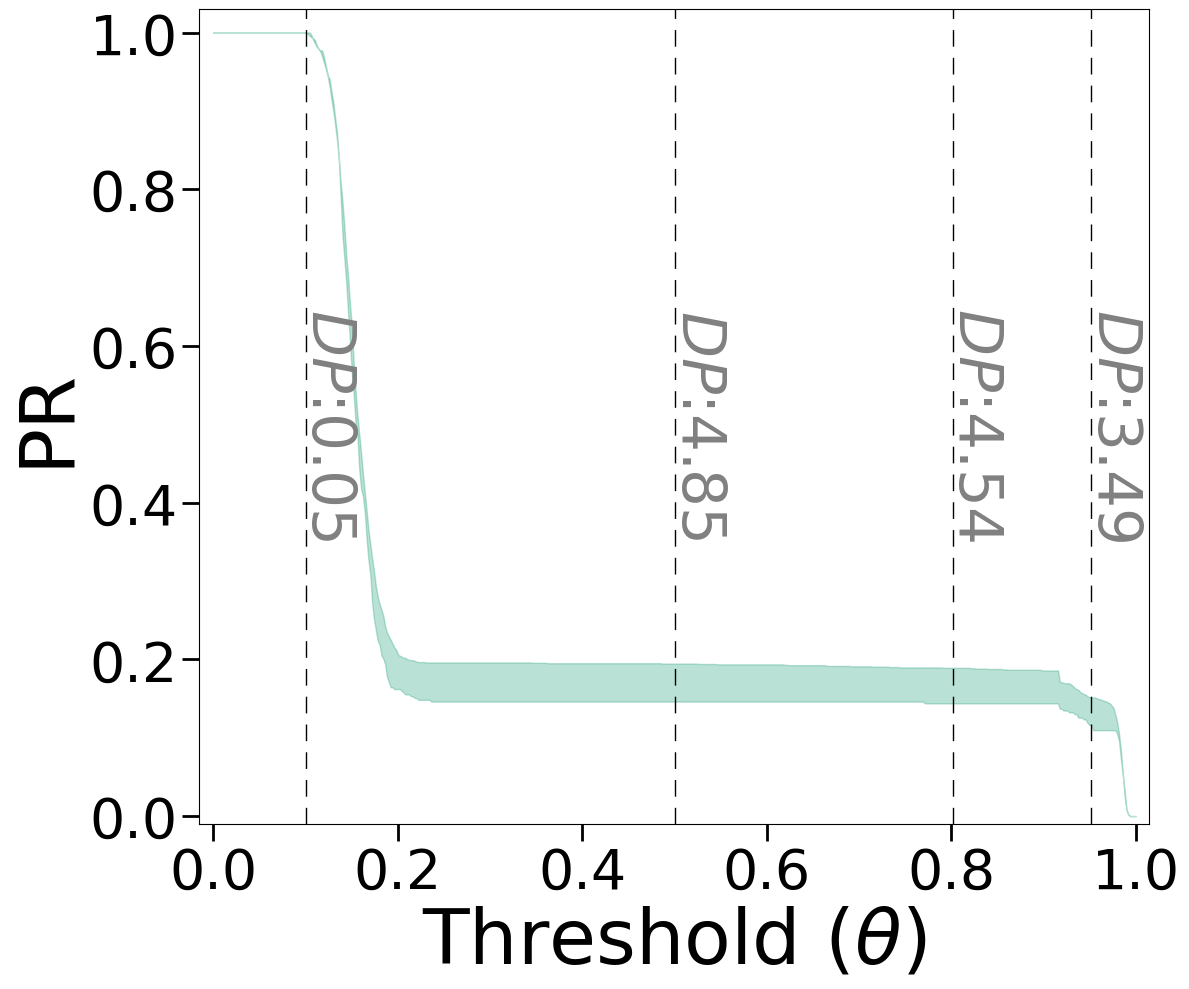

In [3]:
import numpy as np
import pandas as pd
from fairness import *
from sklearn.metrics import roc_curve, auc
import pickle

with open('sens_attr_dict_test.pkl', 'rb') as file:
    sens_attr_dict_test = pickle.load(file)


path_base = os.getcwd()
tasks = ['DBLP-ACM']
models = ['HierMatcher']

for model in models:
    for task in tasks:
      

        df_test = pd.read_csv(path_base +'/DATA_VLDB/'+ task  + '/test.csv')
        scores_test = pd.read_csv(path_base+'/VLDB_RES/'+task+'_'+model+'/score_test.csv')
        sens_test = sens_attr_dict_test[task]

        for x in list(scores_test.columns):
            if len(np.unique(scores_test[x])) >2: 
                prob_test = scores_test[x]
            else:
                y_test = scores_test[x]
            

        sens_array = sens_test
        prob_array = prob_test
        y_array = y_test


        prob_minor = prob_array[sens_array ==1]
        prob_major = prob_array[sens_array ==0]


        y_minor = y_array[sens_array ==1]
        y_major = y_array[sens_array ==0]


        DP, EO, EOD =[], [], []
        PR_minor_all =[]
        PR_major_all =[]


        N = 500
        for theta in np.linspace(0, 1, N):

            y_pred = np.array([1 if score > theta else 0 for score in prob_minor])
            tn, fp, fn, tp = confusion_matrix(y_minor, y_pred).ravel()
            tpr = tp / (tp + fn)
            pr = (tp + fp) / len(y_minor)
            fpr = fp / (fp + tn)
            PR_minor, FPR_minor, TPR_minor = pr, fpr, tpr
            PR_minor_all.append(PR_minor)

            y_pred = np.array([1 if score > theta else 0 for score in prob_major])
            tn, fp, fn, tp = confusion_matrix(y_major, y_pred).ravel()
            tpr = tp / (tp + fn)
            pr = (tp + fp) /len(y_major)
            fpr = fp / (fp + tn)
            PR_major, FPR_major, TPR_major = pr, fpr, tpr
            PR_major_all.append(PR_major)

            DP.append(np.abs(PR_major-PR_minor))

        DSP_DP = 100*np.average(DP)
        Frac = np.linspace(0, 1, N)


plt.figure(figsize=(12,10))
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
# plt.fill_between( range,PR_g1,PR_g2, color='red', alpha=0.2, label = 'before: ')
plt.fill_between(Frac, PR_minor_all,PR_major_all, color='#1B9E77', alpha=0.3, label = r'$DSP_{DP}$: 3.89%' )

plt.ylabel('PR', fontsize = 55)
plt.xlabel('Threshold (' + r'$\theta$'+')', fontsize =55)  
# plt.legend(fontsize = 48, loc = 'upper right', framealpha=1,  bbox_to_anchor=(1.02, 1.02))
plt.ylim([0.0-0.01,1+0.03])
plt.xlim([0.0-0.015,1.015])


for i in  [50, 250, 500 * 8 // 10, 500 * 95 // 100]:
    x = Frac[i]
    plt.axvline(x=x, color='black', linestyle='--', linewidth=1, dashes=(12, 8))


x = Frac[50]
y = 0.5
plt.text(
    x +0.0251, y, r'$DP$:'+str(round(100*DP[50],2)),
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


x = Frac[250]
y = 0.5
plt.text(
    # x +0.025, y, r'$EOD_{(\theta =0.5) } $:'+str(round(100*EOD[250],2))+'%',  # Modify text content as needed
    x +0.0251, y, r'$DP$:'+str(round(100*DP[250],2)),
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'  
)


x = Frac[500 * 8 // 10]
y = 0.5
plt.text(
    x +0.0251, y, r'$DP$:'+str(round(100*DP[500 * 8 // 10],2)),
    # x +0.025, y, r'$EOD_{(\theta =0.8) } $:'+str(round(100*EOD[500 * 8 // 10],2))+'%',  # Modify text content as needed
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


x = Frac[500 * 95 // 100]
y = 0.5
plt.text(
    # x +0.025, y, r'$EOD_{(\theta =0.95) } $:'+str(round(100*EOD[500 * 95 // 100],2))+'%',  # Modify text content as needed
    x +0.0251, y, r'$DP $:'+str(round(100*DP[500 * 95 // 100],2)),  # Modify text content as needed
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)

    


# x = Frac[50]
# y = 0.5
# plt.text(
#     x +0.025, y, r'$DP_{(\theta =0.1) } $:'+str(round(100*DP[50],2))+'%',  # Modify text content as needed
#     rotation=-90,  # Rotate the text to align with the vertical line
#     va='center', ha='center',  # Center the text on both axes
#     fontsize=30  
# )


# x = Frac[250]
# y = 0.5
# plt.text(
#     x +0.025, y, r'$DP_{(\theta =0.5) } $:'+str(round(100*DP[250],2))+'%',  # Modify text content as needed
#     rotation=-90,  # Rotate the text to align with the vertical line
#     va='center', ha='center',  # Center the text on both axes
#     fontsize=30  
# )


# x = Frac[500 * 8 // 10]
# y = 0.5
# plt.text(
#     x +0.025, y, r'$DP_{(\theta =0.8) } $:'+str(round(100*DP[500 * 8 // 10],2))+'%',  # Modify text content as needed
#     rotation=-90,  # Rotate the text to align with the vertical line
#     va='center', ha='center',  # Center the text on both axes
#     fontsize=30  
# )


# x = Frac[500 * 95 // 100]
# y = 0.5
# plt.text(
#     x +0.025, y, r'$DP_{(\theta =0.95) } $:'+str(round(100*DP[500 * 95 // 100],2))+'%',  # Modify text content as needed
#     rotation=-90,  # Rotate the text to align with the vertical line
#     va='center', ha='center',  # Center the text on both axes
#     fontsize=30  
# )


    
plt.tick_params(axis='both', which='both', length=12, width=2)
plt.tight_layout()
plt.savefig('PR_compare.pdf')


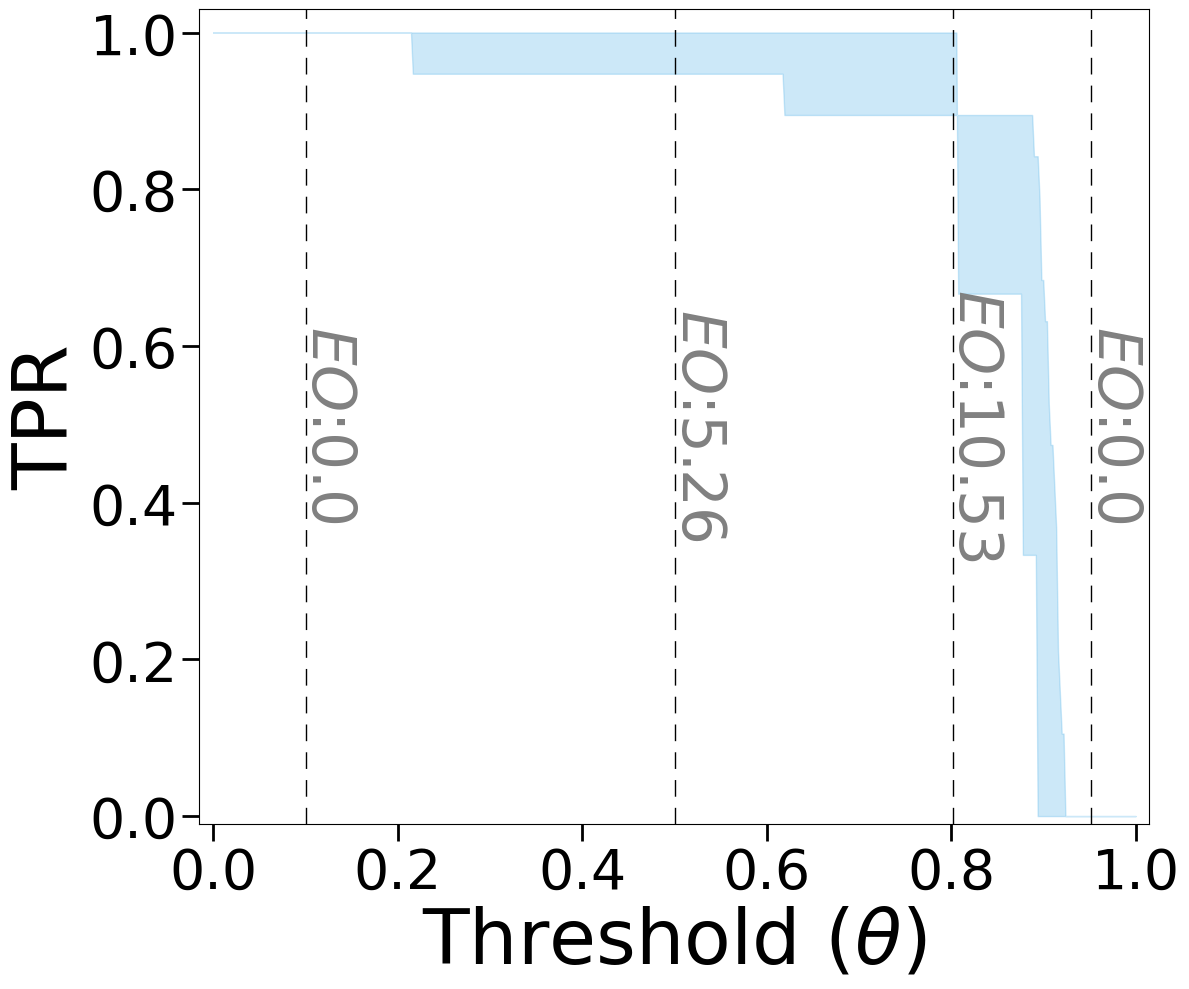

In [4]:
import numpy as np
import pandas as pd
from fairness import *
from sklearn.metrics import roc_curve, auc
import pickle

with open('sens_attr_dict_test.pkl', 'rb') as file:
    sens_attr_dict_test = pickle.load(file)





path_base = os.getcwd()
tasks = ['Fodors-Zagat']
models = ['DITTO']


    
for model in models:

    for task in tasks:
        # if task+'_'+model in skip_combinations: continue


        df_test = pd.read_csv(path_base +'/DATA_VLDB/'+ task  + '/test.csv')
        scores_test = pd.read_csv(path_base+'/VLDB_RES/'+task+'_'+model+'/score_test.csv')
        sens_test = sens_attr_dict_test[task]

        for x in list(scores_test.columns):
            if len(np.unique(scores_test[x])) >2: 
                prob_test = scores_test[x]
            else:
                y_test = scores_test[x]
            

        sens_array = sens_test
        prob_array = prob_test
        y_array = y_test


        prob_minor = prob_array[sens_array ==1]
        prob_major = prob_array[sens_array ==0]


        y_minor = y_array[sens_array ==1]
        y_major = y_array[sens_array ==0]


        DP, EO, EOD =[], [], []
        PR_minor_all =[]
        TPR_minor_all =[]

        PR_major_all =[]
        TPR_major_all =[]



        N = 500
        for theta in np.linspace(0, 1, N):

            y_pred = np.array([1 if score > theta else 0 for score in prob_minor])
            tn, fp, fn, tp = confusion_matrix(y_minor, y_pred).ravel()
            tpr = tp / (tp + fn)
            pr = (tp + fp) / len(y_minor)
            fpr = fp / (fp + tn)
            PR_minor, FPR_minor, TPR_minor = pr, fpr, tpr
            PR_minor_all.append(PR_minor)
            TPR_minor_all.append(TPR_minor)

            y_pred = np.array([1 if score > theta else 0 for score in prob_major])
            tn, fp, fn, tp = confusion_matrix(y_major, y_pred).ravel()
            tpr = tp / (tp + fn)
            pr = (tp + fp) /len(y_major)
            fpr = fp / (fp + tn)
            PR_major, FPR_major, TPR_major = pr, fpr, tpr
            PR_major_all.append(PR_major)
            TPR_major_all.append(TPR_major)

            EO.append(np.abs(TPR_major - TPR_minor))
            DP.append(np.abs(PR_major-PR_minor))

        DSP_EO = 100*np.average(EO)
        Frac = np.linspace(0, 1, N)


plt.figure(figsize=(12,10))
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
# plt.fill_between( range,PR_g1,PR_g2, color='red', alpha=0.2, label = 'before: ')
plt.fill_between(Frac, TPR_minor_all,TPR_major_all, color='#56B4E9', alpha=0.3, label = r'$DSP_{EO}$: 7.99%' )
plt.ylabel('TPR', fontsize = 55)

plt.xlabel('Threshold (' + r'$\theta$'+')', fontsize =55)  
# plt.legend(fontsize = 48, loc = 'lower left', framealpha=1,  bbox_to_anchor=(-0.02, -0.02))
plt.ylim([0.0-0.01,1+0.03])
plt.xlim([0.0-0.015,1.015])


for i in  [50, 250, 500 * 8 // 10, 500 * 95 // 100]:
    x = Frac[i]
    plt.axvline(x=x, color='black', linestyle='--', linewidth=1, dashes=(12, 8))



x = Frac[50]
y = 0.5
plt.text(
    x +0.0251, y, r'$EO$:'+str(round(100*EO[50],2)),
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


x = Frac[250]
y = 0.5
plt.text(
    # x +0.025, y, r'$EOD_{(\theta =0.5) } $:'+str(round(100*EOD[250],2))+'%',  # Modify text content as needed
    x +0.0251, y, r'$EO$:'+str(round(100*EO[250],2)),
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'  
)


x = Frac[500 * 8 // 10]
y = 0.5
plt.text(
    x +0.0251, y, r'$EO$:'+str(round(100*EO[500 * 8 // 10],2)),
    # x +0.025, y, r'$EOD_{(\theta =0.8) } $:'+str(round(100*EOD[500 * 8 // 10],2))+'%',  # Modify text content as needed
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


x = Frac[500 * 95 // 100]
y = 0.5
plt.text(
    # x +0.025, y, r'$EOD_{(\theta =0.95) } $:'+str(round(100*EOD[500 * 95 // 100],2))+'%',  # Modify text content as needed
    x +0.0251, y, r'$EO $:'+str(round(100*EO[500 * 95 // 100],2)),  # Modify text content as needed
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


    
plt.tick_params(axis='both', which='both', length=12, width=2)
plt.tight_layout()
plt.savefig('EO_compare.pdf')


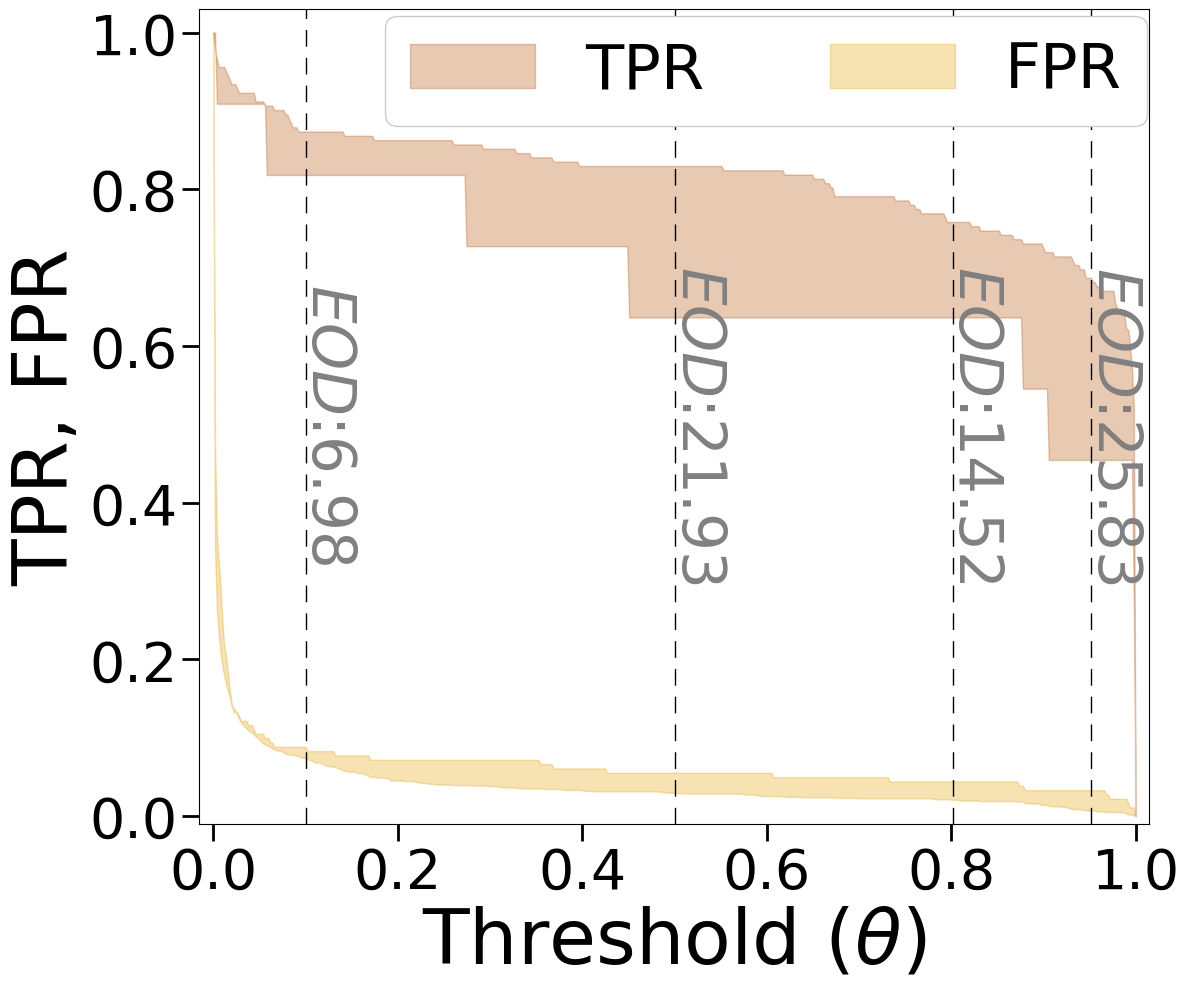

In [5]:
import numpy as np
import pandas as pd
from fairness import *
from sklearn.metrics import roc_curve, auc
import pickle

with open('sens_attr_dict_test.pkl', 'rb') as file:
    sens_attr_dict_test = pickle.load(file)


LATEX = False



path_base = os.getcwd()

tasks = ['Walmart-Amazon']
models = ['HierGAT']


    
for model in models:
    for task in tasks:
        # if task+'_'+model in skip_combinations: continue


        df_test = pd.read_csv(path_base +'/DATA_VLDB/'+ task  + '/test.csv')
        scores_test = pd.read_csv(path_base+'/VLDB_RES/'+task+'_'+model+'/score_test.csv')
        sens_test = sens_attr_dict_test[task]

        for x in list(scores_test.columns):
            if len(np.unique(scores_test[x])) >2: 
                prob_test = scores_test[x]
            else:
                y_test = scores_test[x]
            

        sens_array = sens_test
        prob_array = prob_test
        y_array = y_test


        prob_minor = prob_array[sens_array ==1]
        prob_major = prob_array[sens_array ==0]


        y_minor = y_array[sens_array ==1]
        y_major = y_array[sens_array ==0]


        DP, EO, EOD =[], [], []
        PR_minor_all =[]
        TPR_minor_all =[]
        FPR_minor_all =[]

        PR_major_all =[]
        TPR_major_all =[]
        FPR_major_all =[]

        N = 500
        for theta in np.linspace(0, 1, N):

            y_pred = np.array([1 if score > theta else 0 for score in prob_minor])
            tn, fp, fn, tp = confusion_matrix(y_minor, y_pred).ravel()
            tpr = tp / (tp + fn)
            pr = (tp + fp) / len(y_minor)
            fpr = fp / (fp + tn)
            PR_minor, FPR_minor, TPR_minor = pr, fpr, tpr
            PR_minor_all.append(PR_minor)
            TPR_minor_all.append(TPR_minor)
            FPR_minor_all.append(FPR_minor)

            y_pred = np.array([1 if score > theta else 0 for score in prob_major])
            tn, fp, fn, tp = confusion_matrix(y_major, y_pred).ravel()
            tpr = tp / (tp + fn)
            pr = (tp + fp) /len(y_major)
            fpr = fp / (fp + tn)
            PR_major, FPR_major, TPR_major = pr, fpr, tpr
            PR_major_all.append(PR_major)
            TPR_major_all.append(TPR_major)
            FPR_major_all.append(FPR_major)

            EOD.append((np.abs(TPR_major - TPR_minor) + np.abs(FPR_major - FPR_minor)))
            EO.append(np.abs(TPR_major - TPR_minor))
            DP.append(np.abs(PR_major-PR_minor))

        DSP_EOD = 100*np.average(EOD) 
        DSP_EO = 100*np.average(EO)
        DSP_DP = 100*np.average(DP)
        Frac = np.linspace(0, 1, N)
 
        

plt.figure(figsize=(12,10))
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.fill_between(Frac, TPR_minor_all,TPR_major_all, color='#B44D00', alpha=0.3 ,label = 'TPR') #label = r'$DSP_{EOD}$: 15.26%' )
plt.fill_between(Frac, FPR_minor_all,FPR_major_all, color='#E69F00', alpha=0.3 ,label = 'FPR')
plt.ylabel('TPR, FPR', fontsize = 55)

plt.xlabel('Threshold (' + r'$\theta$'+')', fontsize =55)  
plt.legend(fontsize = 45, loc = 'upper right', framealpha=1,  bbox_to_anchor=(1.03, 1.03),ncol=2)
plt.ylim([0.0-0.01,1+0.03])
plt.xlim([0.0-0.015,1.015])


for i in  [50, 250, 500 * 8 // 10, 500 * 95 // 100]:
    x = Frac[i]
    plt.axvline(x=x, color='black', linestyle='--', linewidth=1, dashes=(12, 8))

x = Frac[50]
y = 0.5
plt.text(
    x +0.0251, y, r'$EOD$:'+str(round(100*EOD[50],2)),
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


x = Frac[250]
y = 0.5
plt.text(
    # x +0.025, y, r'$EOD_{(\theta =0.5) } $:'+str(round(100*EOD[250],2))+'%',  # Modify text content as needed
    x +0.0251, y, r'$EOD$:'+str(round(100*EOD[250],2)),
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'  
)


x = Frac[500 * 8 // 10]
y = 0.5
plt.text(
    x +0.0251, y, r'$EOD$:'+str(round(100*EOD[500 * 8 // 10],2)),
    # x +0.025, y, r'$EOD_{(\theta =0.8) } $:'+str(round(100*EOD[500 * 8 // 10],2))+'%',  # Modify text content as needed
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)


x = Frac[500 * 95 // 100]
y = 0.5
plt.text(
    # x +0.025, y, r'$EOD_{(\theta =0.95) } $:'+str(round(100*EOD[500 * 95 // 100],2))+'%',  # Modify text content as needed
    x +0.0251, y, r'$EOD $:'+str(round(100*EOD[500 * 95 // 100],2)),  # Modify text content as needed
    rotation=-90,  # Rotate the text to align with the vertical line
    va='center', ha='center',  # Center the text on both axes
    fontsize=43,     color='gray'
)

    
plt.tick_params(axis='both', which='both', length=12, width=2)
plt.tight_layout()
plt.savefig('EOD_compare.pdf')
